# Analyzing Movies From the Past Three Decades

## Introduction

The following data set has been retrieved from kaggle.com (https://www.kaggle.com/danielgrijalvas/movies). The dataset includes nearly 7,000 movies taken from the past three decades (31 years specifically). This is a lot of data and hopefully some solid conclusions can be made from it. While it may not contain every movie ever made, it does include a very large chunk of movies from the modern era. 

The data set was originally obtained from IMDb and includes the following information: movie budget, company that produced the movie, the country in which it was filmed, movie director, genre, total movie gross, name of movie, MPAA rating, release date, runtime, average movie score rated by viewers, featured movie star, total viewer votes, writer, and year of release. Unfortunately, budget was not provided for approximately 2000 films —all of which are removed during any analysis that includes movie budget.

For a small portion of background on some of this information provided: Movie scores have been rated on a 10-point scale. The vast majority of movies have an MPAA rating of G, PG, PG-13, or R. The first film included is *Black Moon Rising*, released in January of 1986. The final film included is *Leap!*, released in August of 2017. The shortest film released was *Wings of Courage*, running a mere 50 minutes. The longest film release was *The Best of Youth*, which ran a colossal 6+ hours in two seperate parts.

Out of these thousands of movies that have been released over the past 30+ years some have performed poorly, some have received rewards, and some have been satisfactory. These movies play a large role in our culture and there are a number of questions that we could attempt to answer about each one of these nearly 7,000 films, but we will be focusing on 3:

**#1 What role do budget and gross play in movie scores?** 

**#2 What factors affect their gross?**

**#3 And if budget and/or gross don't determine movie scores, what does?**

In [278]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import seaborn as sns

In [251]:
df = pd.read_csv("movies.csv",encoding ='latin1')

In [252]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [253]:
df.describe()df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [254]:
#dataframe exlcuding movies withought budget
df_budget = df[df.budget !=0]
df_budget.describe()

,budget,gross,runtime,score,votes,year
count,4.638000e+03,4.638000e+03,4638.000000,4638.000000,4.638000e+03,4638.000000
mean,3.614560e+07,4.607469e+07,107.595515,6.356317,9.570254e+04,2002.489435
std,3.996947e+07,6.629378e+07,18.022792,1.011063,1.493878e+05,8.461472
min,6.000000e+03,3.090000e+02,69.000000,1.500000,1.830000e+02,1986.000000
25%,1.000000e+07,6.290905e+06,96.000000,5.800000,1.611050e+04,1996.000000
50%,2.300000e+07,2.345551e+07,104.000000,6.400000,4.394000e+04,2003.000000
75%,4.600000e+07,5.778243e+07,117.000000,7.100000,1.093932e+05,2010.000000
max,3.000000e+08,9.366622e+08,280.000000,9.300000,1.861666e+06,2016.000000


In [224]:
df['bins'] = pd.cut(df_budget['budget'],
                    bins=[1,25000000,50000000,75000000,100000000,125000000,150000000,1000000000], 
                    labels=["$0-25M","$25-50M","$50-75M","$75-100M","$100-125M","$125-150M","$150M+"])

## #1 What Role do Budget and Gross Play in Movie Scores?

### Summarization of Movie Budgets and Gross

#### Information on Movie Budgets
To answer our first question, let's begin by taking a look at the general budget of films. We'll accomplish this by using pie charts to view the amount of money used by films and a bar chart to formulate a general idea of the average amount of money spent on films of each genre. (Remember, a large portion of film budgets were unprovided or unknown. As such, any portion of this analysis relating to budget has had these ~2000 movies removed.)

**Important Note: The distribution of movie budgets is heavily skewed to the right. As such, median will be used as a better representative of the centeral location of data (rather than using the mean).*

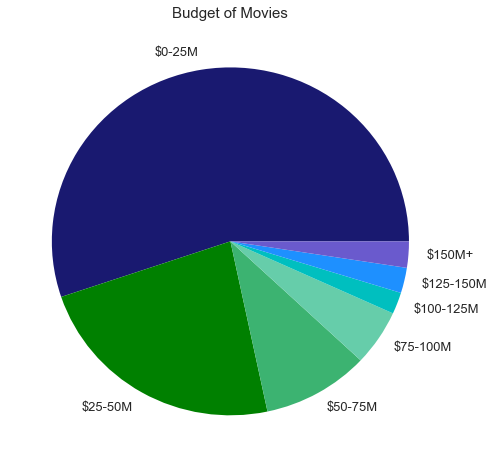

In [275]:
#budget pie chart
df['bins'] = pd.cut(df_budget['budget'],
                    bins=[1,25000000,50000000,75000000,100000000,125000000,150000000,1000000000], 
                    labels=["$0-25M","$25-50M","$50-75M","$75-100M","$100-125M","$125-150M","$150M+"])
pie_budget = df_budget.groupby('bins').size()
colors=(['midnightblue','green','mediumseagreen','mediumaquamarine','c','dodgerblue','slateblue'])
pie_budget.plot.pie(figsize=(8,8),colors=colors)
plt.ylabel('')
plt.title('Budget of Movies', fontsize=15)
plt.show()

You can see from the pie chart that more than half of movie have a budget less than $25 million. This makes sense, as most films do not require a massive budget as they do not have expensive star actors, special effects, or animation. The pie chart also shows that nearly a quarter of movie budgets lie between $25-50 million and that less than a quarter of movies have budgets between $50-150 million. 

Finally, only a small portion of films use a budget greater than $150 million. Movies that require incredibly high budgets tend to have "big" actors. But what elevates the budget to an ever high level is digital editing of animation or special effects. Some of the top most expensive movies to make have been (in descending order): *Pirates of the Caribbean: At World's End, Tangled, Spider-Man 3, The Hobbit: The Battle of the Five Armies, Avengers: Age of Ultron,* and *Batman v Superman: Dawn of Justice.*

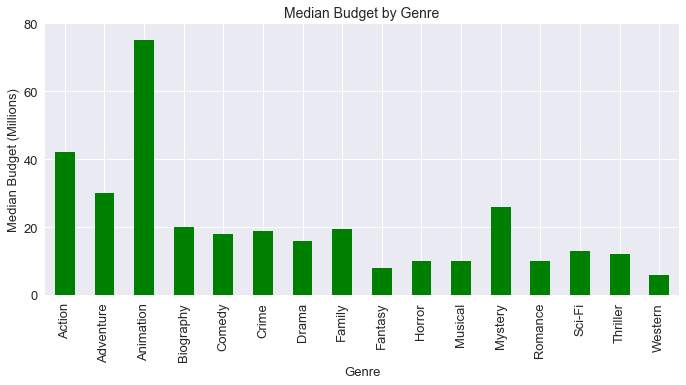

In [256]:
#genre/score
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
df_budget.groupby('genre').budget.median().plot(kind = "bar", color = 'green')
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Median Budget (Millions)', fontsize=13)
plt.title('Median Budget by Genre', fontsize=14)
tick_val = [0, 20000000, 40000000, 60000000, 80000000]
tick_lab = ['0','20', '40', '60', '80']  
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

As expected, animation movies top the charts in budget size by genre. They exceed a median budget of almost $70 million (at least $30 million or 75% above the next highest genre). The greatest factor influencing this is quite possibly the amount of money spent on modern day animation films by the top three major companies: Disney, Pixar, and Dreamworks. Many of their modern films exceed budgets of $100 million.

Also noteworthy, action and adventure movies have considerbly higher budgets than most other genres as well. Action movies have a median budget of more than $40 million and adventure movies a median of ~$30 million. These genres are both expected to have high budget averages as they include movie series that are known for their substantial expenses. Some well known and sizable budget film series included in the action genre are: *Marvel superhero movies, DC uperhero movies, Pirates of the Caribbean,* and *Star Wars.* The adventure genre includes large budget film series such as *Harry Potter* and *The Hobbit.*

The lowest median of film budgets appear to be fantasy, horror, musical, romance, and western —all of which fall below $10 million. The most surprising genres with lower budget averages are fantasy and sci-fi. We would expect them to have higher budgets but this is most likely due to "sub-genres" that are not included. Films such as Harry Potter, Pirates of the Caribbean, and the Hobbit could be claimed as fantasy but they are not. Films such as Star Wars, Star Trek, and Avater could be considered sci-fi but they are not.

#### Information on Gross of Movies
Let's continue by familiarizing ourself with the general gross of movies. Similarly, we will be using a pie chart to visiualize the amount of money grossed by movies and a bar chart to determine the average gross of each film genre.

**Important Notes: As with budget, the distribution of movie gross is heavily skewed to the right. As such, median will be used as a better representative of the centeral location of data (rather than using the mean). The films that do not have budget included have also been removed from this portion, to allow a meaningful comparison between budget and gross.*

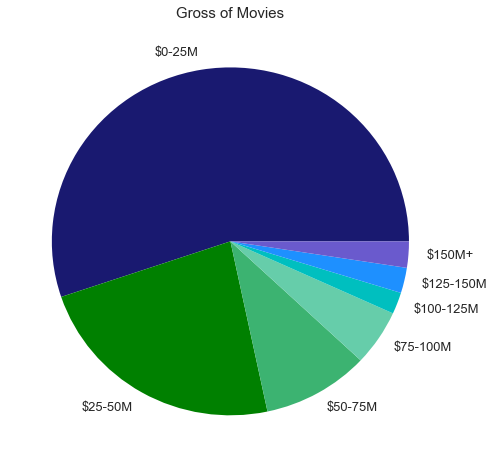

In [274]:
#budget pie chart
df['bins'] = pd.cut(df_budget['gross'],
                    bins=[1,25000000,50000000,75000000,100000000,125000000,150000000,1000000000], 
                    labels=["$0-25M","$25-50M","$50-75M","$75-100M","$100-125M","$125-150M","$150M+"])
pie_gross = df_budget.groupby('bins').size()
colors=(['midnightblue','green','mediumseagreen','mediumaquamarine','c','dodgerblue','slateblue'])
pie_gross.plot.pie(figsize=(8,8), colors=colors)
plt.ylabel('')
plt.title('Gross of Movies', fontsize=15)
plt.show()

It may seem surprising that this pie chart is nearly identically to that of budget. But when looking closer at the numbers we can see that some movies actually gross less than their budget, some gross very close to their budget, and some gross much more than their budget. Because of this we can expect the slices of our gross pie chart to "even out" and end up looking very similar to our budget pie chart. 

We can see that more than half of movies gross less than $25 million, nearly a quart gross $25-50 million, less than a quarter gross between $50-$125 million, and a small but significant portion of movies gross over $150 million. The greatest existing difference between gross and budget is that budget maxes out at $300 million. Gross has over 60 films that surpassed $300 million, but this does not creat a significant appearance on a pie chart when there are nearly 5,000 films included.

**The highest grossing movie in this dataset is Star Wars: The Force Awakens, reaching ~$937 million. With a budget of $245 million that means that their gross was almost quadruple their budget!*

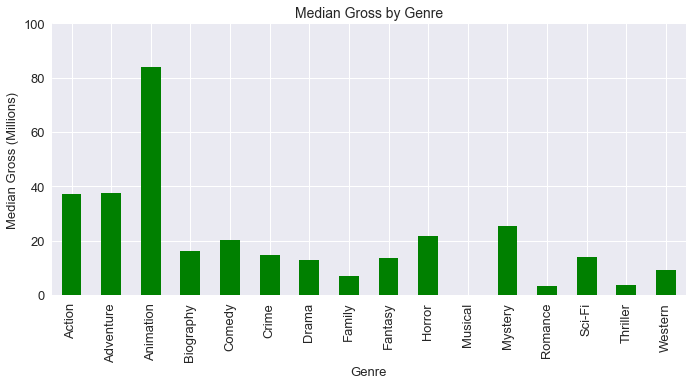

In [258]:
#genre/score
plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
df_budget.groupby('genre').gross.median().plot(kind = "bar", color = 'green')
plt.xlabel('Genre', fontsize=13)
plt.ylabel('Median Gross (Millions)', fontsize=13)
plt.title('Median Gross by Genre', fontsize=14)
tick_val = [0, 20000000, 40000000, 60000000, 80000000, 100000000]
tick_lab = ['0','20', '40', '60', '80', '100']  
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

The animation genre vastly outgrosses all other genres, reaching above $80 million. Once again, this most likely occurs because of the large concentration of high gross animated movies created by Disney, Pixar, and Dreamworks. There are few animation movie with low budgets or low gross, thus the median is centralized at a much higher budget and gross. The top five grossing animation movies include (in descending order): *Finding Dory, Shrek 2, Toy Story 3, Frozen,* and *Finding Nemo.*

Shockingly, the median gross of action movies (<$40 million) is lower than the median budget (>$40 million). This signifies that, on average, action movies are actually making less than they spend on making movies. 

Adventure movies, on the other hand, are grossing more than their budgets. While the difference is not significant, they are not losing money like the average action movie. Adventure movies gross a median of ~$36 and have a budget median of ~$30 million.

Musical, Romance, and Thriller movies have the worst performance in relation to gross. Musical's median gross is abismal. This must be due to a similar problem with "sub-genres." While one would expect *La La Land* and *High School Musical* to be considered musicals they are in fact primarily categorized as comedies.

### So what role do budget and gross play in movie scores?
Now that we have viewed a general background on movie budgets and gross, let's take a look at whether they play significant roles in movie scores. Scatterplots combined with  regression lines will be an accurate tool in determining if there is a significant correlation between them. First, we will look at budget. Second we will see gross.

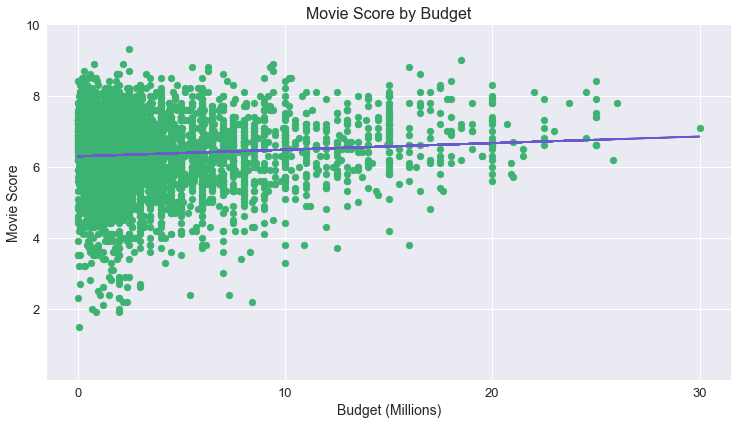

In [293]:
#budget/score scatterplot
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["budget"], df_budget["score"], color = 'mediumseagreen')
plt.xlabel('Budget (Millions)', fontsize=14)
plt.ylabel('Movie Score', fontsize=14)
plt.title('Movie Score by Budget', fontsize=16)

x= df_budget["budget"]
y = df_budget["score"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"slateblue")

tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
x = [0, 100000000, 200000000, 300000000]
labels = ['0', '10', '20', '30']
plt.xticks(x, labels)

plt.tight_layout()
plt.show()

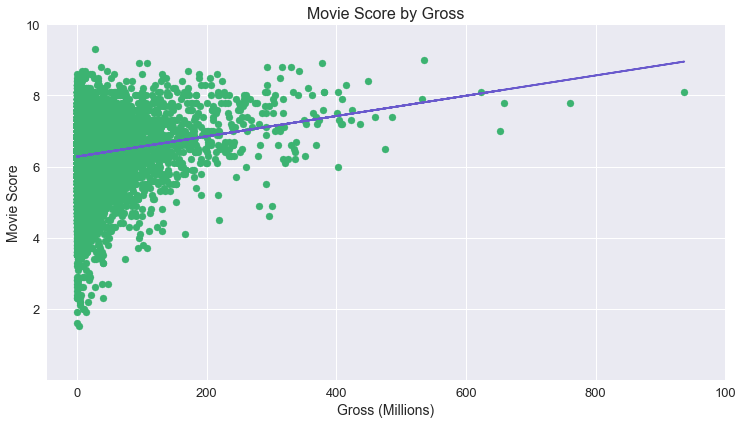

In [294]:
#gross/score scatterplot
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.scatter(df["gross"], df["score"], color = 'mediumseagreen')
plt.xlabel('Gross (Millions)', fontsize=14)
plt.ylabel('Movie Score', fontsize=14)
plt.title('Movie Score by Gross', fontsize=16)

x= df["gross"]
y = df["score"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"slateblue")

tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
x = [0, 200000000, 400000000, 600000000, 800000000, 1000000000]
labels = ['0', '200', '400', '600', '800', '100']
plt.xticks(x, labels)


plt.tight_layout()
plt.show()

A few facts that we can draw from this information: The mean score for movies is 6.4, ranging from a score as low as 1.5 to upwards of 9.3 (out a scale of 10). Total movie budget median is $23 million and the movie gross mean is $23.5 million. The ~60 movies exceeding a gross of $300 million can be seen.

The slope of the budget/score regression line is nearly flat. Thus we can conclude that there is no significant correlation between budget and movies scores. In other words, a large budget does not mean a higher movies score.

The slope of the gross/score regression line is at a positive inclince. We can conclude that there most certainly is a positive correlation between movie gross and score. BUT, this does not indicate that a large gross will cause a high movie score. We cannot imply that correlation is causation. What it does mean is that the more a movie has grossed, the greater the probability that it is a movie that also received a higher score.

**Answer to Question #1:** 

Budget and movie scores are not correlated. Or in other words budget doesn't play a role in movie scores. 

Gross and movie scores are positively correlated! But we cannot necessarily conclude that the gross is the cause.

## #2 What Does Determine Movie Scores?

We've discovered that there is a correlation between gross of movies and their scores. But there is no correlation between budget and movie scores. Perhaps there are other factors that affect movie scores. Let's begin by checking whether genre or release date play an important role in the outcome of movie scores. In order to view the score mean of genres we will be using a boxplot. For determining if their is a correlation between movies scores by release date we will be viwing a line graph.

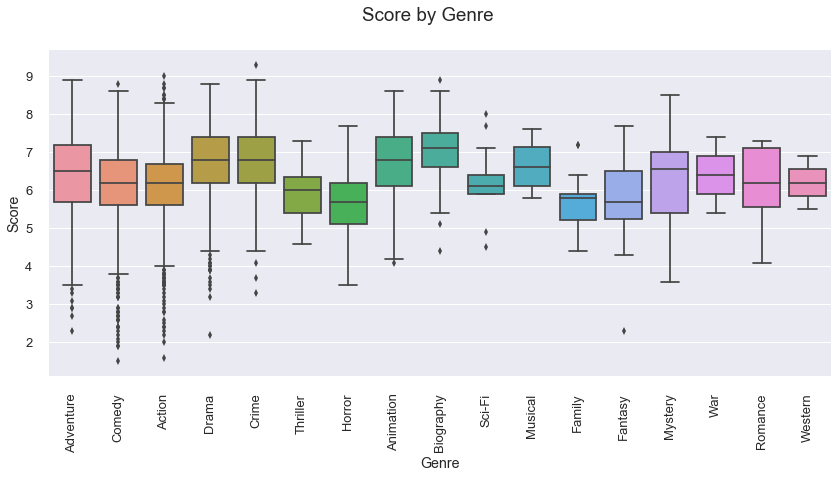

In [261]:
#genre/score boxplot
sns.set(font_scale = 1.3)
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
ax = sns.boxplot(x='genre',y='score',data=df)  
plt.suptitle('Score by Genre')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Genre', ylabel='Score')
plt.xticks(rotation=90)
plt.show()

There aren't many strong conclusions we can make from this boxplot. While there is a high range of scores and outliers among genres (especially adventure, comedy, action, and drama) there does't appear to be any obvious correlation between movie genres and their mean scores. We can see that some of the highest scoring genres are: drama, crime, animation, biography. We can also see that some of the lowest scoring genres are: thiriller, horror, family, and fantasy. But in the end there is nothing significant enough to conclude that specific genres are bound to outperform others.

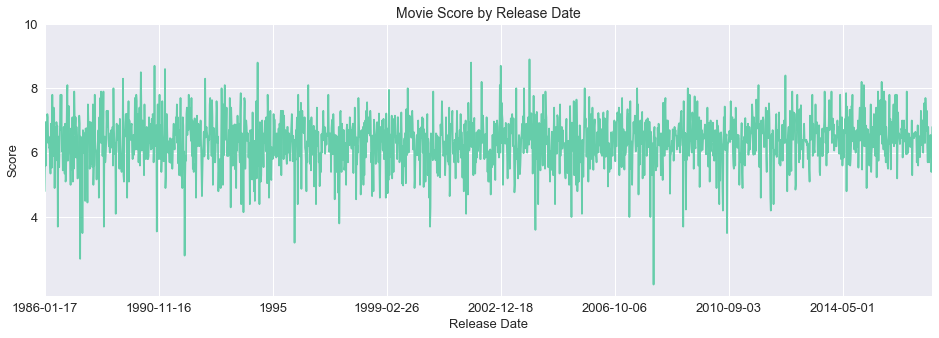

In [292]:
#release date/score
plt.figure(figsize=(35,5))
plt.subplot(1, 2, 1)
df_budget.groupby('released').score.mean().plot(kind = "line", color = 'mediumaquamarine')
plt.xlabel('Release Date', fontsize=13)
plt.ylabel('Score', fontsize=13)
plt.title('Movie Score by Release Date', fontsize=14)
tick_val = [4, 6, 8, 10]
tick_lab = ['4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.show()

Release date does not seem to directly affect movies scores either. A regression line is unnecessary, as there is clearly no trend in this data. While there are varying scores every year, the mean score still tends to surround 6.4 out of 10. This is good news for modern day individuals who take part in creating movies, as they have no need to expect poorer scores in the future. There is a steady flow of movie scores across the past 31 years and would be safe to assume that this will continue.

### Creating a histogram to determine distribution of scores.
Could the writer, director, star actor, or company determine a higher movie score? Let's take the top ~20 occurances of writers, directors, stars, and companies (larger population allowing for more realistic testing) and compare their mean scores to one another to determine this. We can be accomplished by using a t-test, but it must first determine that the distribution of scores is normal by creating a histogram.

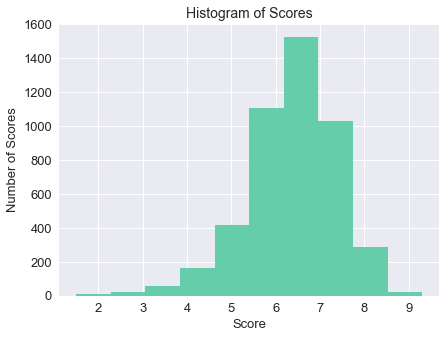

In [263]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(df_budget["score"], color = 'mediumaquamarine')
plt.xlabel('Score', fontsize=13)
plt.ylabel('Number of Scores', fontsize=13)
plt.title('Histogram of Scores', fontsize=14)
plt.show()

Based off the "Histogram of Scores" we can conclude that the distribution is normal —because of the bell shape of the graph. There is a small tail off to the left but not significant enough to cause the graph to be considered skewed left. Because of this normality, we can continue on to creating bar graphs and performing t-tests. We will first conduct t-tests comparing writers and directors. Second, we will compare movies stars and companies. (A t-value and p-value will be provided below each second graph.)

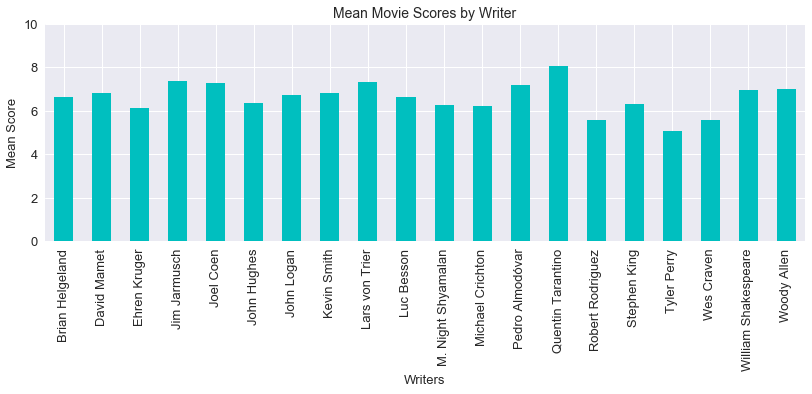

In [264]:
#create new dataframe including: writer, mean score, and count
df2 = df.groupby('writer').mean()['score'].reset_index()
df3 = df.writer.value_counts().reset_index().rename(columns={'index': 'writerz', 'writer': 'count'})
df3 = df3.sort_values(by ='writerz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['writerz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_writers = df4.reset_index(drop=True)
df_writers = df4_writers[df4_writers['count']>9]

#bar chart of writer/score
plt.figure(figsize=(30,4))
plt.subplot(1, 2, 1)
df_writers.groupby('writer').score.mean().plot(kind = "bar", color = 'c')
plt.xlabel('Writers', fontsize=13)
plt.ylabel('Mean Score', fontsize=13)
plt.title('Mean Movie Scores by Writer', fontsize=14)
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

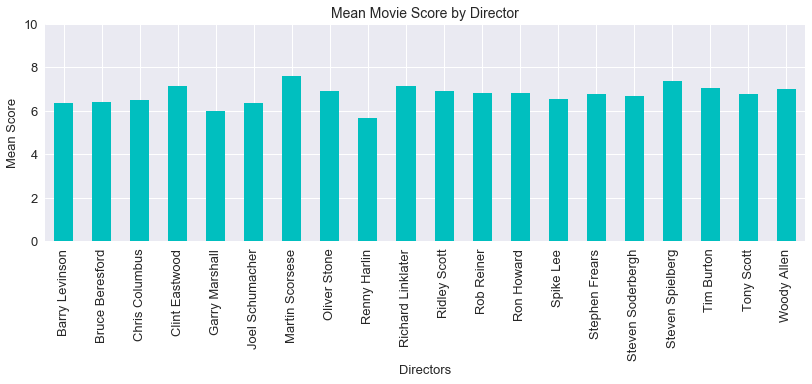

Results of T-Test
T-Value = -0.067  P-Value = 0.507


In [265]:
#create new dataframe including: director, mean score, and count
df2 = df.groupby('director').mean()['score'].reset_index()
df3 = df.director.value_counts().reset_index().rename(columns={'index': 'directorz', 'director': 'count'})
df3 = df3.sort_values(by ='directorz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['directorz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_directors = df4.reset_index(drop=True)
df_directors = df4_directors[df4_directors['count']>14]

#bar chart of director/score
plt.figure(figsize=(30,4))
plt.subplot(1, 2, 1)
df_directors.groupby('director').score.mean().plot(kind = "bar", color = 'c')
plt.xlabel('Directors', fontsize=13)
plt.ylabel('Mean Score', fontsize=13)
plt.title('Mean Movie Score by Director', fontsize=14)
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()
(ttest_ind(df_writers['score'], df_directors['score'], equal_var=False))
print("Results of T-Test")
print("T-Value = -0.067  P-Value = 0.507")

When comparing the mean scores of the stop 20 writers with mean scores of the top 20 directors we receive a t-vlaue of -0.067 and a p-value of 0.0507. Unfortunately, beause our p-value is so high we cannot make any significant conclusions based of our t-value. What does occur is that the incredibly high p-value causes us to assume that the null hypothesis is true (the opposite of what we suggested is true). Thus we can assume that there is NO significant difference in score between the top 20 writers and the top 20 directors.

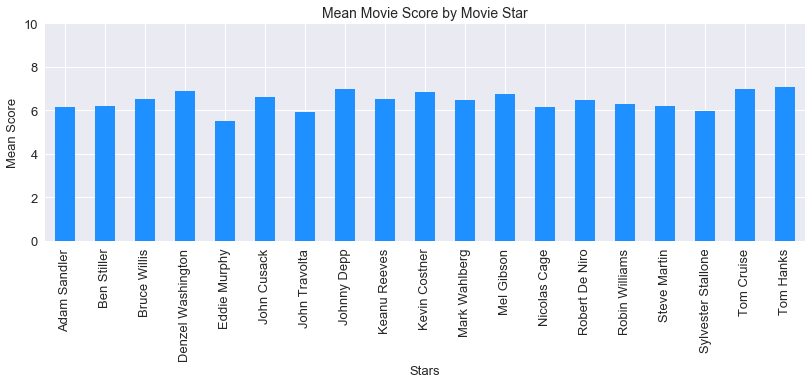

In [266]:
#create new dataframe including: star, mean score, and count
df2 = df.groupby('star').mean()['score'].reset_index()
df3 = df.star.value_counts().reset_index().rename(columns={'index': 'starz', 'star': 'count'})
df3 = df3.sort_values(by ='starz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['starz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_stars = df4.reset_index(drop=True)
df_stars = df4_stars[df4_stars['count']>22]

#bar chart of star/score
plt.figure(figsize=(30,4))
plt.subplot(1, 2, 1)
df_stars.groupby('star').score.mean().plot(kind = "bar", color = 'dodgerblue')
plt.xlabel('Stars', fontsize=13)
plt.ylabel('Mean Score', fontsize=13)
plt.title('Mean Movie Score by Movie Star', fontsize=14)
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

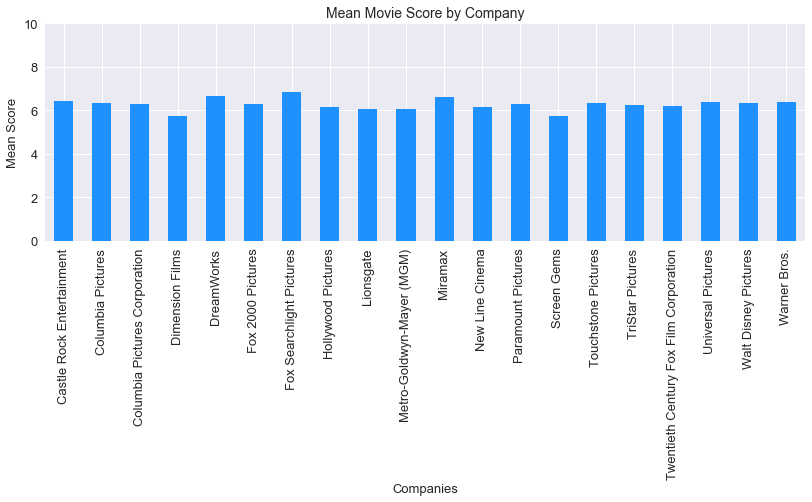

Results of T-Test
T-Value = -1.612  P-Value = 0.117


In [267]:
#create new dataframe including: company, mean score, and count
df2 = df.groupby('company').mean()['score'].reset_index()
df3 = df.company.value_counts().reset_index().rename(columns={'index': 'companyz', 'company': 'count'})
df3 = df3.sort_values(by ='companyz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['companyz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_companies = df4.reset_index(drop=True)
df_companies = df4_companies[df4_companies['count']>40]

#bar chart of company/score
plt.figure(figsize=(30,4))
plt.subplot(1, 2, 1)
df_companies.groupby('company').score.mean().plot(kind = "bar", color = 'dodgerblue')
plt.xlabel('Companies', fontsize=13)
plt.ylabel('Mean Score', fontsize=13)
plt.title('Mean Movie Score by Company', fontsize=14)
tick_val = [0, 2, 4, 6, 8, 10]
tick_lab = ['0','2', '4', '6', '8', '10'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()
(ttest_ind(df_stars['score'], df_companies['score'], equal_var=False))
print("Results of T-Test")
print("T-Value = -1.612  P-Value = 0.117")

Performing a t-test comparing movie stars and companies gives a t-value of -1.612 and a p-value of 0.117. Once again we can see that the p-value is too high to use our t-value to make any significant conclusions (a p-value is required to be .05 or less). Again we can accept the null hypothesis and assume that the mean movie scores of the top 20 stars are not significantly different than the top 20 companies.

### Are there any significant results from comparing other groups?

Perhaps there are other groups, when compared, that will result in a small enough p-value to allow us to use the t-value (instead of causing us to instantly accept the null hypothesis). A chart has been provided showing the results of the six possible t-tests, which includes those that have already been peformed).

In [268]:
#all t-tests, "print" can be added to beginning of each line to see results
(ttest_ind(df_writers['score'], df_directors['score'], equal_var=False))
(ttest_ind(df_writers['score'], df_stars['score'], equal_var=False))
(ttest_ind(df_writers['score'], df_companies['score'], equal_var=False))
(ttest_ind(df_directors['score'], df_stars['score'], equal_var=False))
(ttest_ind(df_directors['score'], df_companies['score'], equal_var=False))
(ttest_ind(df_stars['score'], df_companies['score'], equal_var=False))

#creating pandas chart including t-values and p-values
group_array = np.array([[-0.67,0.5073],[0.9,0.3748],[2.068,0.0495],[2.085,0.044],[4.023,0.0004],[1.612,0.1175]])
df_groups = pd.DataFrame(group_array)

#labeling
df_groups.index = ['Writers vs Directors','Writers vs Stars','Writers vs Companies',
                     'Directors vs Stars','Directors vs Companies', 'Stars vs Companies']
df_groups.columns = ['T-Value','P-Value']
df_groups

,T-Value,P-Value
Writers vs Directors,-0.670,0.5073
Writers vs Stars,0.900,0.3748
Writers vs Companies,2.068,0.0495
Directors vs Stars,2.085,0.0440
Directors vs Companies,4.023,0.0004
Stars vs Companies,1.612,0.1175


It appears that there are some p-values that are small enough! There are three t-tests that result in a p-value greater than .05 and three tests that result in a p-value less than five.

The three tests that have a p-value less than .05 are: Writers vs Companies, Directors vs Stars, and Directors vs Companies.

Writers vs Companies has a t-value of 2.068. This provides us with sufficient information to say that the mean score of the top 20 writers is greater than the mean score of the top 20 companies. In fact, it puts the mean score of writers more than two standard errors above the mean score of companies (over 47.7% higher, beyond the 97.7th percentile).

Directors vs Stars has a t-value of 2.085. These results are very similar to the comparison of writers vs companies. Simply put it means: The mean score of the top directors is two standard errors above the mean score of the top stars, placing it more than 47.7% higher.

Directors vs Companies has a t-value of 4.023. This is a significant difference in means, allowing us to conclude that the mean score of the top 20 directors is far above the mean score of the top 20 companies. We can say this with even greater confidence since our p-value is miniscule: 0.0004. The mean score of top directors is more than four standard errors above the mean score of top companies. The difference is so large that the mean score of top directors sits more than 49.994% above the mean score of top companies (beyond the 99.994th percentile)!

**A perfect situation: If one would hope to receive the highest movie score possible (based off of these results) they would want to focus on a better writer and director than company and movie star. Ex. Quentin Tarantino (writer) + Martin Scorsese (director) = the best possible results!*

**Answer to Question #2:** 

The mean score of the top 20 writers is higher than the mean score of the top 20 companies. 

The mean score of the top 20 directors is higher than the mean score of the top 20 movie stars. 

The mean score of the top 20 directors is significantly higher than the mean score of the top 20 companies.

For the best movie score results one would want to focus on selecting one of the top 20 writer and top 20 directors.

## #3 What Factors Affect Movie Gross?

### Budget and Gross

Scores are a powerful indicator of movie success, but we all know it's really about the money. Since we've talked A LOT about movie gross and movie budget, let's begin by putting the two together and see if movie budgets and movie gross are correlated. We'll be using a scatter plot to detect if a higher budget input can lead to a larger gross output.

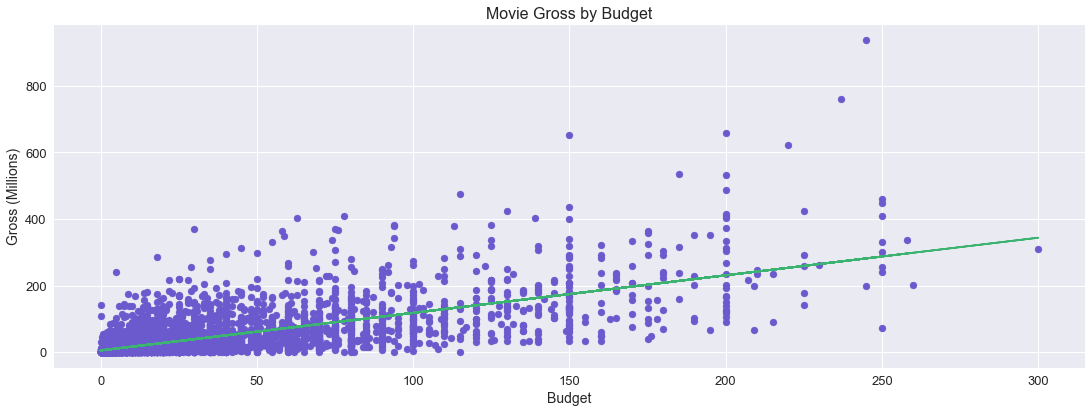

In [269]:
#budget/gross scatterplot
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
plt.scatter(df_budget["budget"], df_budget["gross"], color = 'slateblue')
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Gross (Millions)', fontsize=14)
plt.title('Movie Gross by Budget', fontsize=16)

tick_val = [0, 200000000, 400000000, 600000000, 800000000]
tick_lab = ['0','200', '400', '600', '800'] 
plt.yticks(tick_val, tick_lab, fontsize=13)
x = [0, 50000000, 100000000, 150000000, 200000000, 250000000, 300000000]
labels = ['0', '50', '100', '150', '200', '250', '300']
plt.xticks(x, labels)

x= df_budget["budget"]
y = df_budget["gross"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"mediumseagreen")

plt.tight_layout()
plt.show()

The trend is clear in this scatterplot: there is a significant correlation between budget and gross. The regression is at a stead inclince, indicating a positive correlation between the two. Perhaps an appropriate speculation as to why budget and gross are correlated is due to advertising. Movies with a large budget are able to host a greater volume of TV commercials, billboards, and internet advertisements. 

If a film maker is seeking a higher gross they should also be seeking for a higher budget!

### Country, Rating, and Runtime

Moving on; let's see if the country of filming, MPAA rating, or runtime are important factors in determining the gross of movies. To maximize our viewing potential we will be using bar charts to describe country of filming and movie rating. A line graph will be used to view movie runtime, as it is a more appropriate visualization of time.

**Important Notes: Median will once again be used as an average or central indicator of data (in place of mean). This is because gross is heavily skewed right. Also, many countries have only a few or even just one movie filmed in them. To better represent this data only the top 20 most frequently occuring countries have been included.*

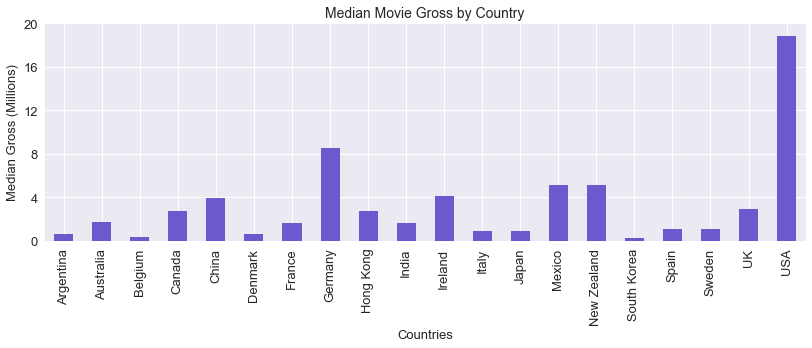

In [333]:
#create new dataframe including: company, mean score, and count
df2 = df.groupby('country').median()['gross'].reset_index()
df3 = df.country.value_counts().reset_index().rename(columns={'index': 'countryz', 'country': 'count'})
df3 = df3.sort_values(by ='countryz')
df3 = df3.reset_index(drop=True)
df4 = pd.concat([df2, df3], axis = 1)
del df4['countryz']
df4 = df4.sort_values(by = 'count', ascending = 0)
df4_countries = df4.reset_index(drop=True)
df_countries = df4_companies[df4_companies['count']>12]

#bar chart of company/score
plt.figure(figsize=(30,4))
plt.subplot(1, 2, 1)
df_countries.groupby('country').gross.median().plot(kind = "bar", color = 'slateblue')
plt.xlabel('Countries', fontsize=13)
plt.ylabel('Median Gross (Millions)', fontsize=13)
plt.title('Median Movie Gross by Country', fontsize=14)
tick_val = [0, 4000000, 8000000, 12000000, 16000000, 20000000]
tick_lab = ['0','4', '8', '12', '16', '20']
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)
plt.show()

Evidently, movies filmed in specific countries tend to have a much higher gross. The highest median gross is found in movies filmed in the USA. The median movie gross in the United States is ~$18 million. The USA is also where the vast majority of movies are filmed, reaching nearly 5,000 movies. The top three grossing movies in the USA are: *Star Wars: The Force Awakens, Titanic,* and *Jurassic World.*

The next top four performing countries and their respective #1 grossing movies are: Germany; *Gran Torino*, Mexico; *Instructions Not Included*, New Zealand; *The Lord of the Rings: The Fellowship of the Ring*, Ireland; *All Dogs Go to Heaven.*

Some of the lowest grossing countries in which movies were filmed are: Argentina, Belgium, Denmark, and South Korea. These countries performed so poorly that there median movie gross hardly even appear on the bar chart.

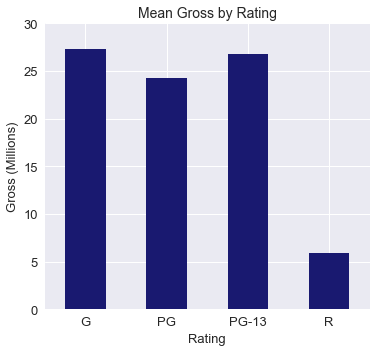

In [339]:
#Gross/Rating
df_rating = df.loc[~df['rating'].isin(['B', 'B15', 'NC-17', 'NOT RATED', 
                                       'Not specified', 'TV-14', 'TV-MA', 'TV-PG', 'UNRATED'])]
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
df_rating.groupby('rating').gross.median().plot(kind = "bar", color = 'midnightblue')
plt.xlabel('Rating', fontsize=13)
plt.ylabel('Gross (Millions)', fontsize=13)
plt.title('Mean Gross by Rating', fontsize=14)
tick_val = [0, 5000000, 10000000, 15000000, 20000000, 25000000, 30000000]
tick_lab = ['0','5', '10', '15', '20', '25', '30'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=0)
plt.tight_layout()

The highest median of grossing films tends to be rated "G", with rated "PG-13" movies just a sliver less, and rated "PG" movies in a close third. Gross of rated "G" movies is about ~$27 million, gross of rated "PG" movies is ~$24 million, and gross of rated "PG-13" movies is just less than ~$27 million.

The lowest grossing films tend to be rated "R." Their median gross is significantly lower, reaching approximately $6 million. Perhaps the largest reason for this is due to rated "R" films limiting the range of their audience. Whether that is because of their restriction of individuals under the age of 17, individuals who refused to based off of moral values, or simply because an individual is uncomfortable with the content (blood, gore, explicit language, nudity, etc). 

**Film makers looking to make more money should definitely make their films "G," "PG," or "PG-13."*

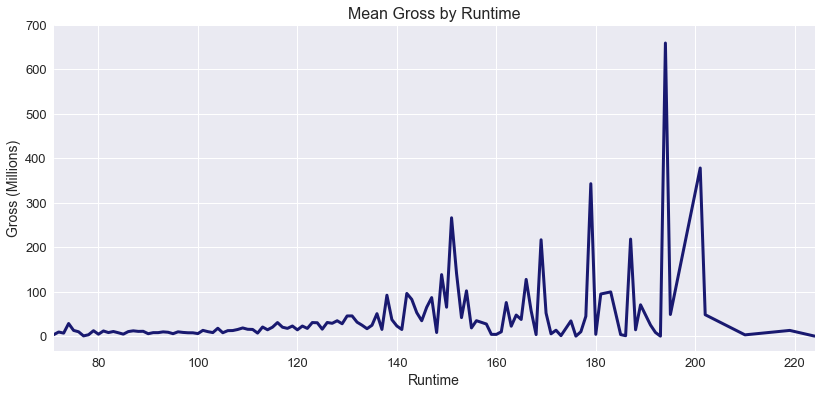

In [331]:
#Gross/Runtime
df1 = df[df['runtime'] >70]
df2 = df1[df1['runtime'] <230]
plt.figure(figsize=(30,6))
plt.subplot(1, 2, 1)
df2.groupby('runtime').gross.median().plot(kind = "line", color = 'midnightblue', linewidth=3.0)
plt.xlabel('Runtime', fontsize=14)
plt.ylabel('Gross (Millions)', fontsize=14)
plt.title('Mean Gross by Runtime', fontsize=16)
tick_val = [0, 100000000, 200000000, 300000000, 400000000, 500000000, 600000000, 700000000]
tick_lab = ['0','100', '200', '300', '400', '500', '600', '700'] 
plt.yticks(tick_val, tick_lab)
plt.show()

Runtime appears to play a vital role in movie gross. It is obvious in the graph above that the "sweet spot" for movie runtime sits somewhere between 140 and 205 minutes. Many of the films in that range exceed a median gross of $100 million. Most of the movies with a runtime below 140 minutes don't exceed a median gross of $50 million and no movies exceed a median gross of $50 million that have a runtime beyond 205 minutes.

The ideal zone for the highest gross of movies appears to be between 192 and 203 minutes, as there the two highest peaks are reach in this zone: ~$650 million and ~$375 million.

**Answer to Question #3:** 

Budget and Gross are correlated. A higher budget movie tends to have a higher gross. 

The top five countries for highest average movie gross are: USA, Germany, Mexico, New Zealand, and Ireland.

"G," "PG," and "PG-13" rated movies have the highest median gross. 

Movies between 140-210 minutes have a higher median gross. Movies between 192 and 203 minutes have the highest median gross.

## Conclusion

### Answers to our Questions:

**Answer to Question #1:** 

Budget and movie scores are not correlated. Or in other words budget doesn't play a role in movie scores. Gross and movie scores are positively correlated! But we cannot necessarily conclude that the gross is the cause.

**Answer to Question #2:** 

The mean score of the top 20 writers is higher than the mean score of the top 20 companies. The mean score of the top 20 directors is higher than the mean score of the top 20 movie stars. The mean score of the top 20 directors is significantly higher than the mean score of the top 20 companies. For the best movie score results one would want to focus on selecting one of the top 20 writers and top 20 directors.

**Answer to Question #3:** 

Budget and Gross are correlated. A higher budget movie tends to have a higher gross. The top five countries for highest average movie gross are: USA, Germany, Mexico, New Zealand, and Ireland. "G," "PG," and "PG-13" rated movies have the highest median gross. Movies between 140-210 minutes have a higher median gross. Movies between 192 and 203 minutes have the highest median gross.

### Further Research:

The questions we could ask about this dataset seem to be limitless. I have only answered a few of these questions myself. In the future one could ask questions such as: What kind of movies are associated with what runtime? What is the approximate movie profits (gross - budget)? Is the a correlation between gross/budget and net? What incluence do votes have on movie scores? Or one could delve deeper into the question already asked by creating smaller boundaries. (ex. correlation of score based on runtime of a specific genre, gross based on a company's budget, etc.) I encourage others to make new questions and enhance the answers I have already attempted to provide.